In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# Load Data

In [3]:
df = pd.read_csv('data.csv')
df.tail(5)

,gcode,ReleaseDate,ListPrice,Brand,Series Title,Character Name,Sculptor,Scale,Size,Material
4639,FIGURE-055847,2020-08-01 00:00:00,2200,Bandai,"""Sword Art Online"" Series",Suguha Kirigaya(Leafa),NaN,NaN,25cm,NaN
4640,FIG-MOE-7067,2012-12-01 00:00:00,8856,SkyTube,SoniComi,Super Sonico,2%,1/6,Approx. H260mm,NaN
4641,FIGURE-035776,2018-12-01 00:00:00,14800,Max Factory,Saekano: How to Raise a Boring Girlfriend,Eriri Spencer Sawamura(Eri Kashiwagi),Abira Purazuma Houriki Mokei,1/7,Approx. H200mm,ABS & PVC
4642,FIG-MOE-2367,2011-04-01 00:00:00,5965,Good Smile Company,Angel Beats!,Yuri Nakamura,Sanzigen,1/8,Approx. H195mm,NaN
4643,HOB-FIG-0560,2006-05-01 00:00:00,16280,Aizu Project,Nadia: The Secret of Blue Water,Nadia,Cherry Blossom,1/7,NaN,NaN


# Clean data

In [4]:
# convert string to datetime type
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

In [5]:
df['ReleaseDate'].max()

Timestamp('2021-12-01 00:00:00')

In [6]:
df['ReleaseDate'].min()

Timestamp('2002-09-01 00:00:00')

### keep only scale 1/6 to 1/9

In [7]:
df = df[df['Scale'].str.contains('1/(6|7|8|9)',regex=True,na=False)]
df.tail(5)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,gcode,ReleaseDate,ListPrice,Brand,Series Title,Character Name,Sculptor,Scale,Size,Material
4637,FIGURE-059725,2020-10-01,19580,Orca Toys,FAIRY TAIL,Erza Scarlet(Erza Knightwalker),Kazushi Kawasaki,1/6,Approx. H275mm,PVC
4640,FIG-MOE-7067,2012-12-01,8856,SkyTube,SoniComi,Super Sonico,2%,1/6,Approx. H260mm,NaN
4641,FIGURE-035776,2018-12-01,14800,Max Factory,Saekano: How to Raise a Boring Girlfriend,Eriri Spencer Sawamura(Eri Kashiwagi),Abira Purazuma Houriki Mokei,1/7,Approx. H200mm,ABS & PVC
4642,FIG-MOE-2367,2011-04-01,5965,Good Smile Company,Angel Beats!,Yuri Nakamura,Sanzigen,1/8,Approx. H195mm,NaN
4643,HOB-FIG-0560,2006-05-01,16280,Aizu Project,Nadia: The Secret of Blue Water,Nadia,Cherry Blossom,1/7,NaN,NaN


### remove rows where price is 0 (server data issues)

In [9]:
df = df[df['ListPrice']!=0]
df.tail(5)

,gcode,ReleaseDate,ListPrice,Brand,Series Title,Character Name,Sculptor,Scale,Size,Material
4637,FIGURE-059725,2020-10-01,19580,Orca Toys,FAIRY TAIL,Erza Scarlet(Erza Knightwalker),Kazushi Kawasaki,1/6,Approx. H275mm,PVC
4640,FIG-MOE-7067,2012-12-01,8856,SkyTube,SoniComi,Super Sonico,2%,1/6,Approx. H260mm,NaN
4641,FIGURE-035776,2018-12-01,14800,Max Factory,Saekano: How to Raise a Boring Girlfriend,Eriri Spencer Sawamura(Eri Kashiwagi),Abira Purazuma Houriki Mokei,1/7,Approx. H200mm,ABS & PVC
4642,FIG-MOE-2367,2011-04-01,5965,Good Smile Company,Angel Beats!,Yuri Nakamura,Sanzigen,1/8,Approx. H195mm,NaN
4643,HOB-FIG-0560,2006-05-01,16280,Aizu Project,Nadia: The Secret of Blue Water,Nadia,Cherry Blossom,1/7,NaN,NaN


# Data Analysis

## Avg price per year

In [10]:
yearlyPrice =  df.groupby(df['ReleaseDate'].dt.to_period('A'))['ListPrice'].agg('mean')
yearlyPrice

ReleaseDate
2003     3278.000000
2004     5238.500000
2005     5809.562500
2006     6963.438776
2007     6714.576159
2008     7725.528090
2009     8944.401198
2010     9841.992481
2011     9670.640449
2012     9934.297297
2013    10007.372781
2014    11551.488506
2015    12797.335260
2016    13642.115854
2017    14643.320856
2018    15198.675926
2019    15766.753425
2020    17242.036667
2021    19036.291262
Freq: A-DEC, Name: ListPrice, dtype: float64

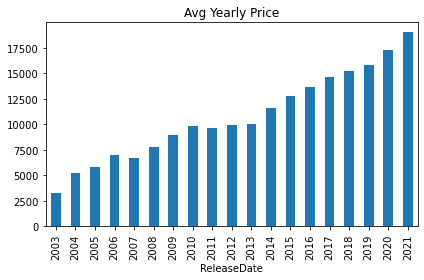

In [60]:
yearlyPricePlt = yearlyPrice.plot(kind='bar',title='Avg Yearly Price')

In [75]:
fig = yearlyPricePlt.get_figure()
fig.set_size_inches(18.5, 10.5)
fig.savefig("yearlyAvgPrice.png")

## Most Expansive Brand

In [50]:
brandAvgPrice =  df.groupby(df['Brand'])['ListPrice'].agg('mean')
MostBrand = brandAvgPrice.sort_values(ascending=False).head(10)

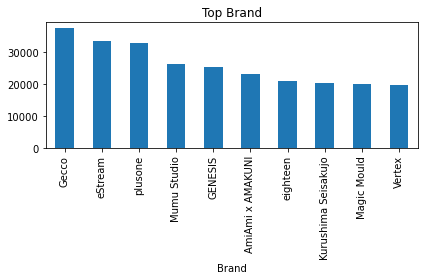

In [64]:
TopBrandPlt = MostBrand.plot(kind='bar',title='Top Brand')

In [74]:
fig = TopBrandPlt.get_figure()
fig.set_size_inches(18.5, 10.5)
fig.savefig("Top Brand.png")

## Series

In [16]:
seriesCount = df.groupby(df['Series Title'])['gcode'].agg('count')
mostSeries = seriesCount.sort_values(ascending=False).head(10)

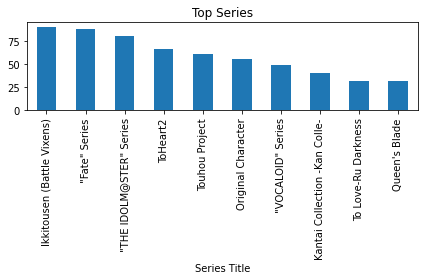

In [56]:
mostSeriesPlt = mostSeries.plot(kind='bar',title='Top Series')

In [73]:
fig = mostSeriesPlt.get_figure()
fig.set_size_inches(18.5, 10.5)
fig.savefig("Most Series.png")

## Character

In [19]:
CharCount = df.groupby(df['Character Name'])['gcode'].agg('count')
mostChar = CharCount.sort_values(ascending=False).head(10)

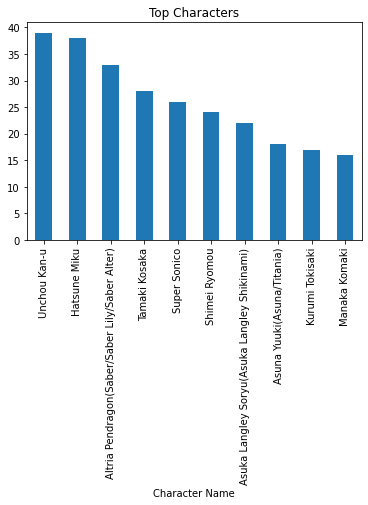

In [66]:
mostCharPlt = mostChar.plot(kind='bar',title='Top Characters')

In [76]:
fig = mostCharPlt.get_figure()
fig.set_size_inches(18.5, 10.5)
fig.savefig("Most Chars.png")